In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
data = pd.read_csv("Train.csv")

In [13]:
data = data.values
X = data[:,:5]
Y = data[:,5]

In [14]:
print(X.shape,Y.shape)

(1600, 5) (1600,)


In [16]:
X

array([[ 0.29341624, -0.94559871, -0.42110515,  0.40681602,  0.52566183],
       [-0.83608408, -0.18922804, -0.77640262, -1.05383124,  0.59799685],
       [ 0.23642511,  0.13283602, -0.14772298,  0.69985396, -0.18736416],
       ...,
       [ 1.04417694, -0.89920649,  1.73039905, -1.87105676,  0.44251965],
       [-1.2691729 , -0.00505216,  1.85766873, -1.08036482,  0.73633394],
       [-1.88400025, -0.84942743, -1.45227035,  0.48861308,  1.4595758 ]])

In [17]:
X = (X-X.mean())/X.std()

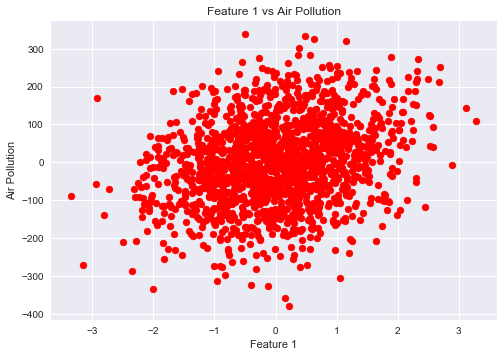

In [19]:
plt.style.use("seaborn")
plt.scatter(X[:,0],Y,color='red')
plt.title("Feature 1 vs Air Pollution")
plt.xlabel("Feature 1")
plt.ylabel("Air Pollution")
plt.show()

In [20]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(1600, 6)


In [25]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    m = X.shape[0]
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [26]:
theta,error_list = gradient_descent(X,Y)

In [27]:
theta

array([ 1.49138699, 29.84297081, 93.16540718,  8.32556432, 45.01071403,
        2.53283406])

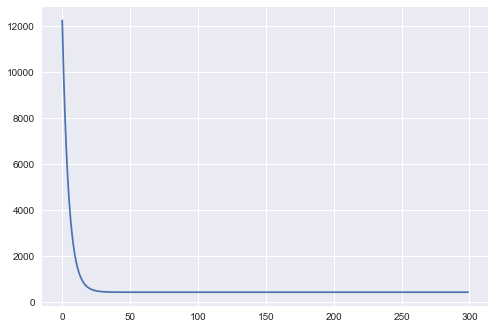

In [30]:
plt.plot(error_list)
plt.show()

In [40]:
x_test = pd.read_csv('Test.csv')

In [41]:
x_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [42]:
x_test = x_test.values

In [43]:
x_test

array([[ 1.01525387e+00,  2.07620944e+00, -2.66434820e-01,
        -2.41808820e+00, -9.80502790e-01],
       [-3.75021204e-01,  9.53184528e-01,  6.26719138e-01,
         7.04405750e-01, -3.55489211e-01],
       [-1.02445225e+00,  9.62991107e-01, -4.07942004e-01,
        -1.86127383e+00,  4.55201351e-01],
       ...,
       [ 5.54727647e-01,  1.76824345e+00, -8.97787210e-01,
        -1.19366107e+00,  3.40563374e-01],
       [-1.62717246e+00,  8.56470994e-01, -5.65729519e-04,
         6.29386649e-01,  4.53382144e-01],
       [ 1.39310499e-01,  5.31597186e-01, -8.53107053e-01,
         3.16920076e-02,  1.71489304e+00]])

In [45]:
ones = np.ones((x_test.shape[0],1))
x_test = np.hstack((ones,x_test))
print(x_test.shape)

(400, 6)


In [46]:
y_test = hypothesis(x_test,theta)

In [47]:
y_test

array([ 111.67892871,  115.12666586,  -25.38451475,  -47.70203638,
        -99.96214912,  -48.27565835,  -79.50333497,   20.42345566,
        171.25211384,  170.2607681 , -109.50105571,  -24.44159574,
         -7.46114547,  120.1401012 ,   36.99998855,   42.43428954,
       -194.18437616,   19.20860754,    8.17756117,  133.55547754,
         61.74192257,  -65.85160206, -112.30857873,  -10.97902554,
        -62.36826246,    8.42683726,   25.86966015,  104.74538943,
         20.75124601,  -29.77336654,  108.04369164,  -48.64996463,
        214.44996164,  -17.46250263, -233.37060443,  152.21005756,
         -5.76458314,    9.26542081, -313.5078994 ,   74.00261185,
        -85.1753456 , -211.28110247, -243.58544562,  131.96209815,
        -77.67843543,  102.50944271,   -7.13690665,   17.1895467 ,
       -102.07740473,  -31.19292253,    7.34793543, -178.9371108 ,
         61.982719  , -101.8639012 , -110.25466753, -160.31522894,
         59.34885216,  105.69191109,  -78.54196151,   38.43951

In [48]:
#Converting to pandas dataframe
df = pd.DataFrame(data=y_test, columns=["target"])

In [51]:
df.to_csv('y_predictions.csv',index = True,index_label="Id")